Chapter 25
# 三维空间Lp范数
Book_2《可视之美》 | 鸢尾花书：从加减乘除到机器学习  

In [1]:
# 导入包
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
import os
# 如果文件夹不存在，创建文件夹
if not os.path.isdir("Figures"):
    os.makedirs("Figures")

## 自定义函数展示隐函数

In [1]:
def plot_implicit(fn, X_plot, Y_plot, Z_plot, ax, bbox):
    
    # 等高线的起止范围
    xmin, xmax, ymin, ymax, zmin, zmax = bbox*3

    ax.set_proj_type('ortho')
    
    # 绘制三条参考线
    k = 1.5
    ax.plot((xmin * k, xmax * k), (0, 0), (0, 0), 'k')
    ax.plot((0, 0), (ymin * k, ymax * k), (0, 0), 'k')
    ax.plot((0, 0), (0, 0), (zmin * k, zmax * k), 'k')
    
    # 等高线的分辨率
    A = np.linspace(xmin, xmax, 500) 
    # 产生网格数据
    A1,A2 = np.meshgrid(A,A)
    
    # 等高线的分割位置
    B = np.linspace(xmin, xmax, 20) 
    
    # 绘制 XY 平面等高线
    if X_plot == True:
        for z in B:
            X,Y = A1,A2
            Z = fn(X,Y,z)
            cset = ax.contour(X, Y, Z+z, [z], 
                              zdir='z', 
                              linewidths = 0.25,
                              colors = '#0066FF', 
                              linestyles = 'solid')

    # 绘制 XZ 平面等高线
    if Y_plot == True:
        for y in B: 
            X,Z = A1,A2
            Y = fn(X,y,Z)
            cset = ax.contour(X, Y+y, Z, [y], 
                              zdir='y', 
                              linewidths = 0.25,
                              colors = '#88DD66', 
                              linestyles = 'solid')
    
    # 绘制 YZ 平面等高线
    if Z_plot == True:
        for x in B: 
            Y,Z = A1,A2
            X = fn(x,Y,Z)
            cset = ax.contour(X+x, Y, Z, [x], 
                              zdir='x', 
                              linewidths = 0.25,
                              colors = '#FF6600', 
                              linestyles = 'solid')

    ax.set_zlim(zmin * k,zmax * k)
    ax.set_xlim(xmin * k,xmax * k)
    ax.set_ylim(ymin * k,ymax * k)
    ax.set_box_aspect([1,1,1]) 
    ax.view_init(azim=-120, elev=30)
    ax.axis('off')

def visualize_four_ways(fn, title, bbox=(-2.5,2.5)):
    
    fig = plt.figure(figsize=(10,4))
    
    ax = fig.add_subplot(1, 4, 1, projection='3d')
    plot_implicit(fn, True, False, False, ax, bbox)

    ax = fig.add_subplot(1, 4, 2, projection='3d')
    plot_implicit(fn, False, True, False, ax, bbox)
    
    ax = fig.add_subplot(1, 4, 3, projection='3d')
    plot_implicit(fn, False, False, True, ax, bbox)
    
    ax = fig.add_subplot(1, 4, 4, projection='3d')
    plot_implicit(fn, True, True, True, ax, bbox)
    
    fig.savefig('Figures/' + title + '.svg', format='svg')

## 可视化

C:\Users\james\AppData\Local\Temp\ipykernel_15172\2907639625.py:27: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X, Y, Z+z, [z],
C:\Users\james\AppData\Local\Temp\ipykernel_15172\2907639625.py:38: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X, Y+y, Z, [y],
C:\Users\james\AppData\Local\Temp\ipykernel_15172\2907639625.py:49: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X+x, Y, Z, [x],


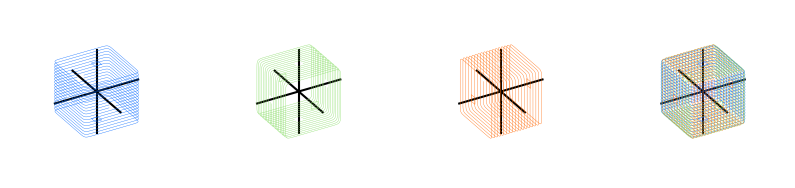

In [11]:
def vector_norm(x,y,z):
    
    p = 16
    
    return (np.abs(x)**p + np.abs(y)**p + np.abs(z)**p)**(1/p) - 1

visualize_four_ways(vector_norm, 'norm_1000', bbox = (-1,1))

In [ ]:
# Repo: https://github.com/Visualize-ML
# Book 2 Beauty of Visualization  |  From Basic Arithmetic to Machine Learning
# Published and copyrighted by Tsinghua University Press
# Beijing, China, 2023